In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from scipy import stats


%matplotlib inline
sns.set(rc={'figure.figsize':(10,8)})

In [27]:
path = 'B:/Karpov Courses/Stat/Lesson_5/5_task_1.csv'
path1 = 'B:/Karpov Courses/Stat/Lesson_5/5_task_2.csv'

In [11]:
df = pd.read_csv(path)

In [12]:
df.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


<AxesSubplot:xlabel='group', ylabel='events'>

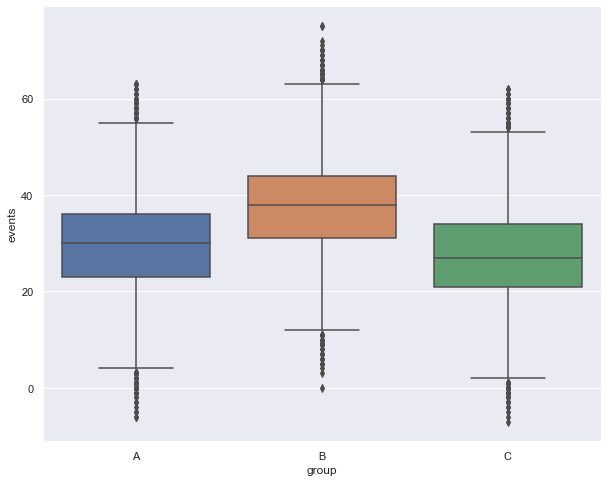

In [13]:
sns.boxplot(x='group', y='events', data=df)


In [14]:
pg.homoscedasticity(data=df, dv = 'events', group='group')

,W,pval,equal_var
levene,2.26226,0.104133,True


In [15]:
A = df.query('group == "A"').events.sample(1000, random_state=17)
B = df.query('group == "A"').events.sample(1000, random_state=17)
C = df.query('group == "C"').events.sample(1000, random_state=17)

<AxesSubplot:>

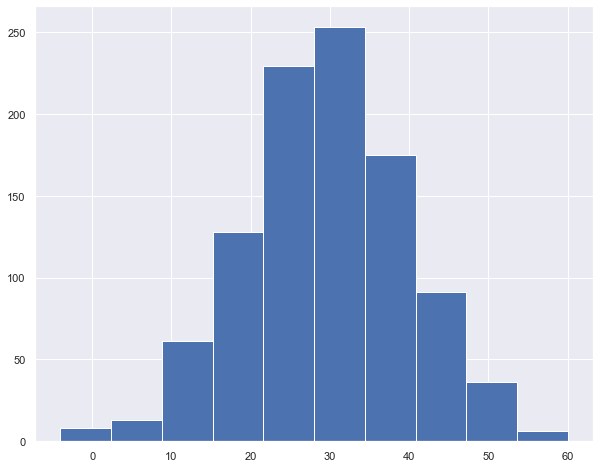

In [16]:
A.hist()

In [17]:
print(stats.shapiro(A))
print(stats.shapiro(B))
print(stats.shapiro(C))

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)
ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)
ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)


In [18]:
pg.normality(df, dv='events', group='group', method='shapiro')

C:\Users\Shaetan\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Shaetan\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Shaetan\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
A,0.998942,0.000004,False
B,0.999016,0.000011,False
C,0.998921,0.000003,False


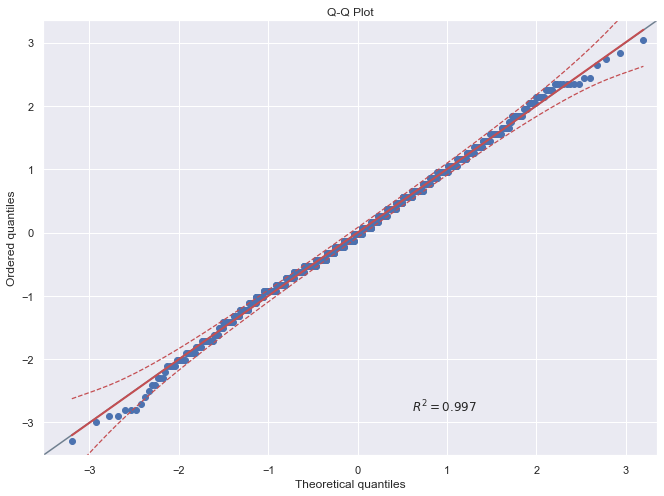

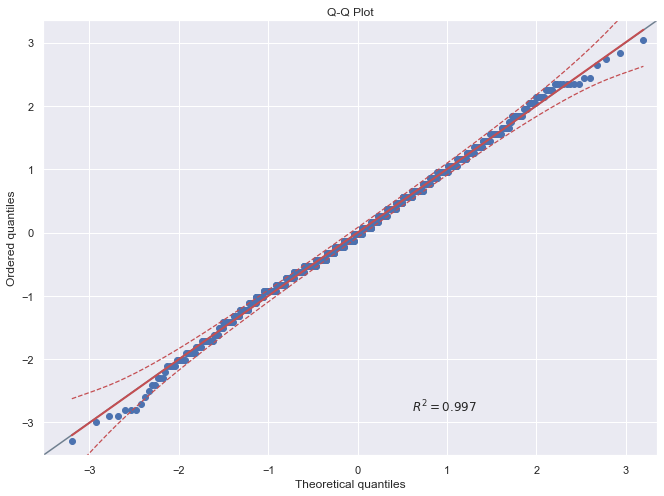

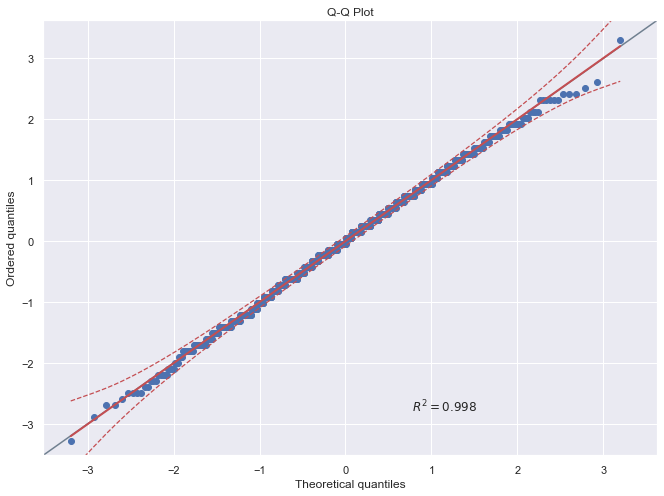

In [19]:
ax = pg.qqplot(A,figsize=(11, 8), dist='norm')
ax = pg.qqplot(B,figsize=(11, 8), dist='norm')
ax = pg.qqplot(C,figsize=(11, 8), dist='norm')

In [20]:
pg.anova(data=df,
    dv='events',
    between='group',
    ss_type=2,
    detailed=False,
    effsize='np2')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [21]:
pg.pairwise_tukey(data=df, dv="events", between="group")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.018089


In [26]:
print(pairwise_tukeyhsd(df.events, df.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034  -0.0   7.7038  8.3642   True
     A      C  -2.1093  -0.0  -2.4395 -1.7791   True
     B      C -10.1433  -0.0 -10.4735 -9.8131   True
----------------------------------------------------


In [31]:
df1 = pd.read_csv(path1)
df1.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [32]:
df1.segment.unique()

array(['high', 'low'], dtype=object)

In [33]:
test = df1.query('group == "test"')
control = df1.query('group == "control"')

<AxesSubplot:>

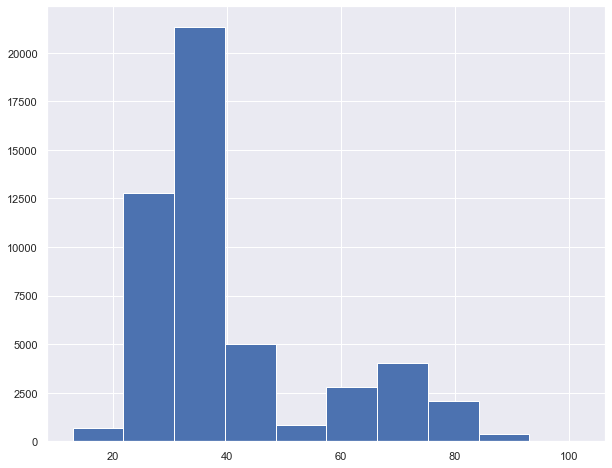

In [35]:
test.events.hist()

<AxesSubplot:>

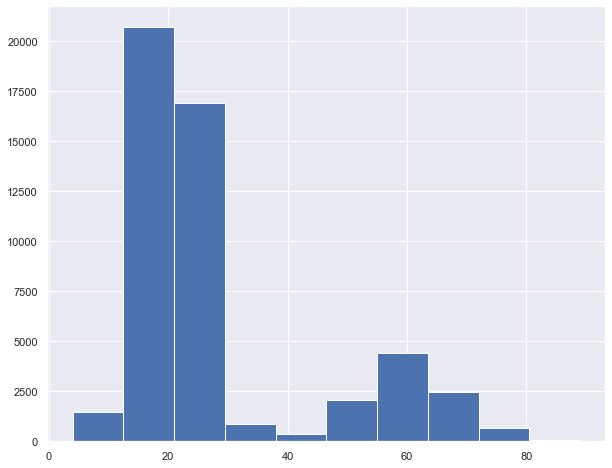

In [36]:
control.events.hist()

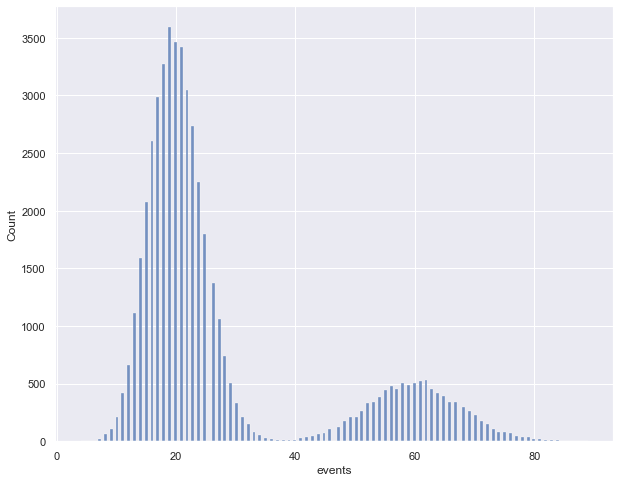

In [40]:
x = sns.histplot(control.events, kde = False)

In [44]:
descr = df1.groupby(['group', 'segment']).events.describe()

count       mean       std   min   25%   50%   75%    max
group   segment                                                             
control high     10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.938500  8.403974  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

In [45]:
pg.anova(data=df1,
    dv='events',
    between=['group', 'segment']
  )

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377485,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [46]:
df1['combination'] = df1['group'] + ' \ ' + df1['segment']

In [47]:
df1


,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high
...,...,...,...,...,...
99995,60695,control,low,15.0,control \ low
99996,5934,control,low,16.0,control \ low
99997,30046,control,low,22.0,control \ low
99998,26474,control,low,21.0,control \ low


In [48]:
pg.pairwise_tukey(data=df1, dv="events", between="combination")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control \ high,control \ low,59.970800,20.031575,39.939225,0.065432,610.391461,0.0,6.824282
1,control \ high,test \ high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.0,-1.703109
2,control \ high,test \ low,59.970800,33.025925,26.944875,0.065432,411.798717,0.0,4.603981
3,control \ low,test \ high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.0,-8.527429
4,control \ low,test \ low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.0,-2.220314
5,test \ high,test \ low,69.938500,33.025925,36.912575,0.065432,564.135148,0.0,6.307128


In [49]:
pairwise_tukeyhsd(df1.events, df1.combination).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control \ high,control \ low,-39.9392,-0.0,-40.1073,-39.7711,True
control \ high,test \ high,9.9677,-0.0,9.7551,10.1803,True
control \ high,test \ low,-26.9449,-0.0,-27.113,-26.7768,True
control \ low,test \ high,49.9069,-0.0,49.7388,50.075,True
control \ low,test \ low,12.9944,-0.0,12.888,13.1007,True
test \ high,test \ low,-36.9126,-0.0,-37.0807,-36.7445,True


Text(0, 0.5, 'Число покупок')

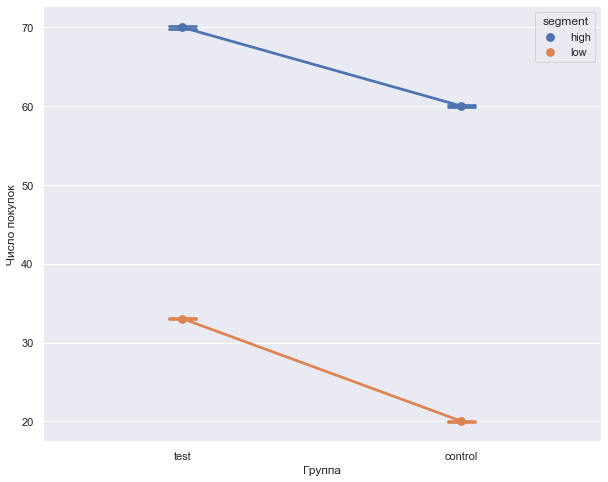

In [52]:
sns.pointplot(x='group', y = 'events', hue = 'segment', data = df1, capsize = .1)
plt.xlabel('Группа')
plt.ylabel('Число покупок')

In [53]:
x = [4,5,2,3,1]
y = [2,1,4,3,5]

In [63]:
df2 = pd.DataFrame([[4, 2], [5, 1], [2, 4], [3,3], [1,5]],
     columns=['X', 'Y'])
df2

,X,Y
0,4,2
1,5,1
2,2,4
3,3,3
4,1,5


<AxesSubplot:xlabel='X', ylabel='Y'>

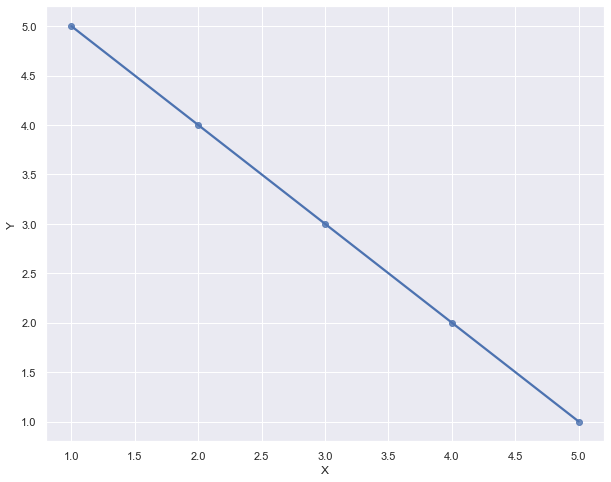

In [64]:
sns.regplot(x = 'X', y = 'Y', data = df2)

In [65]:
stats.pearsonr(df2.X, df2.Y)

(-1.0, 0.0)

In [67]:
0.95**0.5


0.9746794344808963

In [68]:
a = 0.9746794344808963
a*a

0.9499999999999998

In [69]:
df1.corr()

,id,events
id,1.000000,0.003039
events,0.003039,1.000000


In [73]:
df.corr()

,id,events
id,1.000000,-0.004517
events,-0.004517,1.000000


In [76]:
np.corrcoef(df1.events, df1.id)

array([[1.        , 0.00303915],
       [0.00303915, 1.        ]])

In [80]:
round(64.78-0.62*62, 0)


26.0

In [82]:
(150-7.68-10*3.66-0.82*8)/7.62

13.013123359580051

In [83]:
(68.7-50*0.06-0.05*80-0.57*90)

10.400000000000006